In [1]:
import numpy as np, matplotlib.pyplot as plt
# from importlib import reload
import cvflow as cf
% matplotlib inline

import laneFindingPipeline, utils

show = cf.misc.show

colorFilter = cf.ComplexPipeline()

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

In [2]:
%%time
allFrames = laneFindingPipeline.utils.loadFrames(maxframes=10)

frame = allFrames['project'][0]

HBox(children=(IntProgress(value=0, description='load project: ', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='load challenge: ', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='load harder_challenge: ', max=10), HTML(value='')))



CPU times: user 84 ms, sys: 68 ms, total: 152 ms
Wall time: 349 ms


In [3]:
colorFilter.getByKind(cf.Perspective)

<generator object Op.getByKind at 0x7f5821a62e08>

In [4]:
laneFinder = laneFindingPipeline.LaneFinder(colorFilter=colorFilter)

drawn = laneFinder.draw(frame);
# show(drawn);

Saved to /tmp/test0.png.
Saved to /tmp/test1.png.
Saved to /tmp/test2.png.
Saved to /tmp/test3.png.
Saved to /tmp/test4.png.
Saved to /tmp/test5.png.


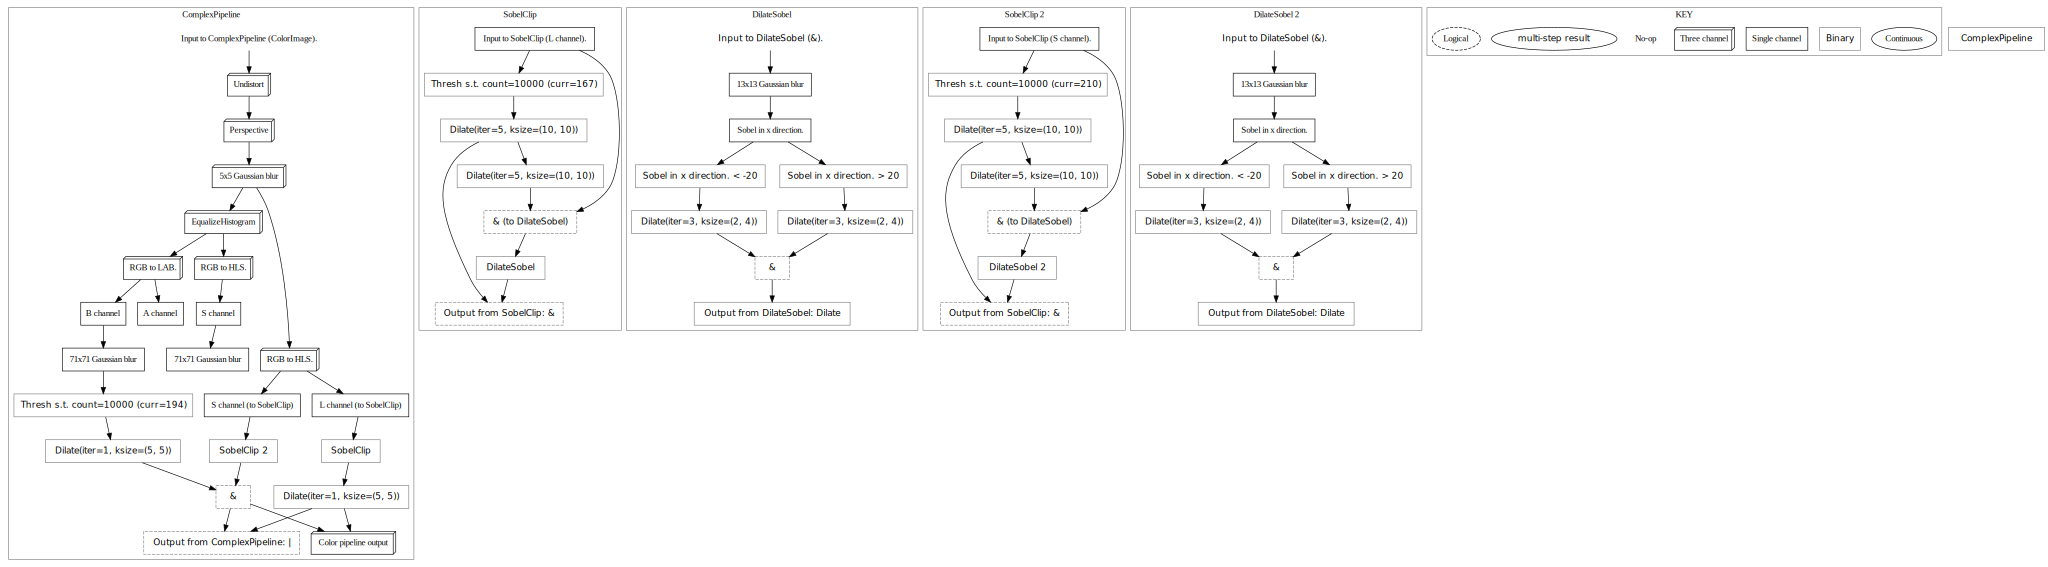

In [5]:
colorFilter.draw(format='png', savePath='/tmp/test')

In [6]:
# %%time
# figs = colorFilter.showMembers(subplotKwargs=dict(figsize=(16,9)), wspace=0)
# for ext in ('png',):
#     for fig in figs:
#         label = fig.texts[0].get_text()
#         ok = 'abcdefghijklmnopqrstuvwxyz'
#         ok += ok.upper() + '01234567890-'
#         for ch in label:
#             if ch not in ok:
#                 label.replace(ch, '_')

In [7]:
raise RuntimeError

RuntimeError: 

Measure frames per second without plotting.

In [ ]:
%%time
import tqdm
for frame in tqdm.tqdm_notebook(allFrames['project'][:100], unit='frame'):
    laneFinder(frame)

In [ ]:
class VisualizeFilter:
    def __call__(self, frame, clearAxes=True, closeFigure=False):
        colorFilter(frame)
        axes = getattr(self, 'axes', None)
        fig = colorFilter.showMembers(
            axes=axes, subplotKwargs=dict(figsize=(16,9)), 
            wspace=0, showMultistepParents=False
        )[0]
        self.axes = fig.axes
        for ax in fig.axes:
            cf.misc.clearTicks(ax)
        out = utils.fig2img(fig)
        if clearAxes:
            for ax in fig.axes:
                ax.cla()
        if closeFigure:
            plt.close(fig)
        return out
    
    @property
    def fig(self):
        return self.axes[0].figure
    
    def visualizeFromKey(self, k, maxFrames=np.inf):
        frames = allFrames[k]
        fpath = 'cf-%s-%s-vis' % (colorFilter, k)
        if maxFrames < np.inf:
            frames = frames[:maxFrames]
            fpath += '-%dframes' % maxFrames
        fpath += '.mp4'
        utils.transformVideo(frames, fpath, visualizePipeline, desc=fpath)
        self(frames[-1], clearAxes=False)
        
    def __del__(self):
        if hasattr(self, 'axes'):
            plt.close(self.fig)

visualizeFilter = VisualizeFilter()

In [ ]:
visualizeFilter.visualizeFromKey('project', maxFrames=2)

In [ ]:
for k in allFrames.keys():
    visualizeFilter.visualizeFromKey(k, maxFrames=32)

In [ ]:
%%time
vids = {}
for k in allFrames.keys():
    vids[k] = []
    vids[k].append(utils.transformVideo(allFrames[k], 'cf-%s-%s.mp4' % (laneFinder.colorFilter, k), laneFinder.draw, desc=k))
    vids[k].append(utils.transformVideo(allFrames[k], 'cf-%s-%s-vis.mp4' % (colorFilter, k), visualizePipeline), desc=k)

In [ ]:
import gc; gc.collect()

In [ ]:
plt.close('all')

In [ ]:
import gc; gc.collect()

In [ ]:
v1

In [ ]:
v1, v2 = vids[k]

In [ ]:
v1

In [ ]:
v2